In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import time
from itertools import combinations

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import xgboost as xgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
import torch

In [3]:
# Load the file with VISDATE as well
csv_file_path3 = 'GENETIC_14Apr2025.csv'
full_df = pd.read_csv(csv_file_path3)
# Updated list of column names, focusing on volumetric measurements (excluding
selected_columns = [
'RID', 'APVOLUME'
]
# Create a dictionary of DataFrames, each containing only one of the specified
dataframe3 = pd.read_csv(csv_file_path3, usecols=selected_columns)
# This will create DataFrames for the columns that exist in the CSV file,
# preventing KeyError in case some columns are missing
print(dataframe3.head())

   RID  APVOLUME
0    2      10.0
1    3      10.0
2    4       8.0
3    5      10.0
4    7       9.0


In [4]:
csv_file_path4 = '/content/UPENNBIOMK_ROCHE_ELECSYS_14Apr2025.csv'

full_df = pd.read_csv(csv_file_path4)
# Updated list of column names, focusing on volumetric measurements (excluding
selected_columns = [
'RID', 'ABETA42','TAU','PTAU'
]
# Create a dictionary of DataFrames, each containing only one of the specified
dataframe4 = pd.read_csv(csv_file_path4, usecols=selected_columns)
# This will create DataFrames for the columns that exist in the CSV file,
# preventing KeyError in case some columns are missing
print(dataframe4.head())

   RID  ABETA42    TAU   PTAU
0    3    741.5  239.7  22.83
1    3    601.4  251.7  24.18
2    4   1501.0  153.1  13.29
3    4   1176.0  159.7  13.30
4    5    547.3  337.0  33.43


In [5]:
import pandas as pd

csv_file_path5 = 'UGOTPTAU181_06_18_20_14Apr2025 (1).csv'

full_df = pd.read_csv(csv_file_path4)
# Updated list of column names, focusing on volumetric measurements (excluding
selected_columns = [
'RID','PLASMAPTAU181',
]
# Create a dictionary of DataFrames, each containing only one of the specified
dataframe5 = pd.read_csv(csv_file_path5, usecols=selected_columns)
# This will create DataFrames for the columns that exist in the CSV file,
# preventing KeyError in case some columns are missing
print(dataframe5.head())

   RID  PLASMAPTAU181
0    2         11.939
1    2         12.936
2    2         13.563
3    2         15.506
4    8         18.305


In [7]:
csv_file_path = 'UCSFFSX7_14Apr2025.csv'

full_df = pd.read_csv(csv_file_path)
# Updated list of column names, focusing on volumetric measurements (excluding
"""selected_columns = [
"ST58CV", "ST58SA", "ST58TA", "ST58TS", # Left Superior Temporal
"ST117CV", "ST117SA", "ST117TA", "ST117TS", # Right Superior Temporal
"ST40CV", "ST40SA", "ST40TA", "ST40TS", # Left Middle Temporal
"ST99CV", "ST99SA", "ST99TA", "ST99TS", # Right Middle Temporal
"ST32CV", "ST32SA", "ST32TA", "ST32TS", # Left Inferior Temporal
"ST91CV", "ST91SA", "ST91TA", "ST91TS", # Right Inferior Temporal
"ST60CV", "ST60SA", "ST60TA", "ST60TS", # Left Temporal Pole
"ST119CV", "ST119SA", "ST119TA", "ST119TS", # Right Temporal Pole
"ST62CV", "ST62SA", "ST62TA", "ST62TS", # Left Transverse Temporal
"ST121CV", "ST121SA", "ST121TA", "ST121TS" # Right Transverse Temporal
]"""
selected_columns = [
"RID",
"ST58TA", # Cortical Thickness Average of Left Superior Temporal
"ST117TA", # Cortical Thickness Average of Right Superior Temporal
"ST40TA", # Cortical Thickness Average of Left Middle Temporal
"ST99TA", # Cortical Thickness Average of Right Middle Temporal
"ST32TA", # Cortical Thickness Average of Left Inferior Temporal
"ST91TA", # Cortical Thickness Average of Right Inferior Temporal
"ST60TA", # Cortical Thickness Average of Left Temporal Pole
"ST119TA", # Cortical Thickness Average of Right Temporal Pole
"ST62TA", # Cortical Thickness Average of Left Transverse Temporal
"ST121TA" # Cortical Thickness Average of Right Transverse Temporal
]
# Create a dictionary of DataFrames, each containing only one of the specified
dataframe9 = pd.read_csv(csv_file_path, usecols=selected_columns)
# This will create DataFrames for the columns that exist in the CSV file,
# preventing KeyError in case some columns are missing
print(dataframe9.head())

    RID  ST117TA  ST119TA  ST121TA  ST32TA  ST40TA  ST58TA  ST60TA  ST62TA  \
0  4213    2.349    3.802    2.145   2.703   2.568   2.471   3.568   2.095   
1  4453    2.571    3.739    2.360   2.509   2.560   2.596   3.785   2.348   
2  4104    2.912    3.865    2.311   2.706   2.663   2.756   3.508   2.421   
3  2153    2.954    3.855    2.770   2.758   2.780   2.922   3.402   2.448   
4  4303    2.554    3.347    2.266   2.693   2.754   2.644   3.303   2.233   

   ST91TA  ST99TA  
0   2.463   2.498  
1   2.734   2.651  
2   2.862   2.903  
3   2.641   2.801  
4   2.824   2.774  


In [8]:
csv_file_path = 'PTDEMOG_14Apr2025 (1).csv'

full_df = pd.read_csv(csv_file_path)
# Updated list of column names, focusing on volumetric measurements (excluding
selected_columns = [
"RID",
# Demographic and Background Information
"PTGENDER", "PTDOB",
# Clinical and Site-Specific Data
#"PTDOBYY", "PTMARRY", "PTEDUCAT","PTETHCAT",
]
# Create a dictionary of DataFrames, each containing only one of the specified
dataframe7 = pd.read_csv(csv_file_path, usecols=selected_columns)
# This will create DataFrames for the columns that exist in the CSV file,
# preventing KeyError in case some columns are missing
print(dataframe7.head())

   RID  PTGENDER    PTDOB
0    2       1.0  04/1931
1    1       2.0  12/1944
2    3       1.0  05/1924
3    4       1.0  01/1938
4    5       1.0  12/1931


In [9]:
csv_file_path = 'MEDHIST_14Apr2025.csv'

full_df = pd.read_csv(csv_file_path)
# Updated list of column names, focusing on volumetric measurements (excluding
selected_columns = [
"RID",
# Medical Conditions Related to Brain Structure
"MH14ALCH", # Alcohol Abuse
"MH15DRUG", # Drug Abuse
"MH16SMOK", # Smoking
"MH2NEURL", # Neurologic (other than AD)
"MHPSYCH" # Psychiatric Conditions
]
# Create a dictionary of DataFrames, each containing only one of the specified
dataframe8 = pd.read_csv(csv_file_path, usecols=selected_columns)
# This will create DataFrames for the columns that exist in the CSV file,
# preventing KeyError in case some columns are missing
print(dataframe8.head())

   RID  MHPSYCH  MH2NEURL  MH14ALCH  MH15DRUG  MH16SMOK
0    2        0         0         0         0         0
1    1        0         0         0         0         0
2    3        0         0         0         0         1
3    4        0         0         0         0         1
4    5        0         0         0         0         1


In [10]:
dfs = [dataframe3, dataframe4, dataframe5, dataframe7, dataframe8, dataframe9]

# Check if 'RID' is present in each DataFrame
rid_check = [True if 'RID' in df.columns else False for df in dfs]

# Display all columns when printing DataFrames
pd.set_option('display.max_columns', None)

# Print the check results
print("RID presence in each DataFrame:", rid_check)

# Merge all DataFrames on 'RID' using inner join
merged_df = reduce(lambda left, right: pd.merge(left, right, on='RID', how='inner'), dfs)

# Display the merged DataFrame
print(merged_df.head())

RID presence in each DataFrame: [True, True, True, True, True, True]
   RID  APVOLUME  ABETA42    TAU   PTAU  PLASMAPTAU181  PTGENDER    PTDOB  \
0   31      10.0   1774.0  266.8  22.55         18.642       2.0  01/1928   
1   31      10.0   1774.0  266.8  22.55         18.642       2.0  01/1928   
2   31      10.0   1774.0  266.8  22.55         18.642       2.0  01/1928   
3   31      10.0   1774.0  266.8  22.55         18.642       2.0  01/1928   
4   31      10.0   1774.0  266.8  22.55         18.642       2.0  01/1928   

   MHPSYCH  MH2NEURL  MH14ALCH  MH15DRUG  MH16SMOK  ST117TA  ST119TA  ST121TA  \
0        0         0         0         0         0    2.318    3.495    2.080   
1        0         0         0         0         0    2.412    2.758    2.469   
2        0         0         0         0         0    2.318    3.495    2.080   
3        0         0         0         0         0    2.412    2.758    2.469   
4        0         0         0         0         0    2.318    

In [11]:
pd.set_option('display.max_columns', None)
print(merged_df.head())

   RID  APVOLUME  ABETA42    TAU   PTAU  PLASMAPTAU181  PTGENDER    PTDOB  \
0   31      10.0   1774.0  266.8  22.55         18.642       2.0  01/1928   
1   31      10.0   1774.0  266.8  22.55         18.642       2.0  01/1928   
2   31      10.0   1774.0  266.8  22.55         18.642       2.0  01/1928   
3   31      10.0   1774.0  266.8  22.55         18.642       2.0  01/1928   
4   31      10.0   1774.0  266.8  22.55         18.642       2.0  01/1928   

   MHPSYCH  MH2NEURL  MH14ALCH  MH15DRUG  MH16SMOK  ST117TA  ST119TA  ST121TA  \
0        0         0         0         0         0    2.318    3.495    2.080   
1        0         0         0         0         0    2.412    2.758    2.469   
2        0         0         0         0         0    2.318    3.495    2.080   
3        0         0         0         0         0    2.412    2.758    2.469   
4        0         0         0         0         0    2.318    3.495    2.080   

   ST32TA  ST40TA  ST58TA  ST60TA  ST62TA  ST91TA 

In [12]:
print(merged_df.describe())

                 RID       APVOLUME        ABETA42            TAU  \
count  742688.000000  579314.000000  740998.000000  740588.000000   
mean     2545.892749       0.444097    1238.469569     271.269763   
std      1516.797451       6.235802     637.193384     132.301563   
min        23.000000      -4.000000     203.000000      80.080000   
25%      1261.000000      -4.000000     702.400000     186.400000   
50%      2245.000000      -4.000000    1106.000000     238.800000   
75%      4175.000000       9.000000    1689.000000     310.000000   
max      5296.000000      12.000000    3949.000000    1018.000000   

                PTAU  PLASMAPTAU181       PTGENDER        MHPSYCH  \
count  737202.000000  742688.000000  703651.000000  742688.000000   
mean       25.252673      16.011811       1.498388       0.405950   
std        14.873441       9.512347       0.640717       0.491075   
min         8.260000       0.468000      -4.000000       0.000000   
25%        16.300000      10.3000

In [13]:
print(merged_df.isnull().sum())

RID                   0
APVOLUME         163374
ABETA42            1690
TAU                2100
PTAU               5486
PLASMAPTAU181         0
PTGENDER          39037
PTDOB             42802
MHPSYCH               0
MH2NEURL              0
MH14ALCH              0
MH15DRUG              0
MH16SMOK              0
ST117TA            5730
ST119TA            5730
ST121TA             560
ST32TA             5730
ST40TA             5730
ST58TA             5730
ST60TA             5730
ST62TA              560
ST91TA             5730
ST99TA             5730
dtype: int64


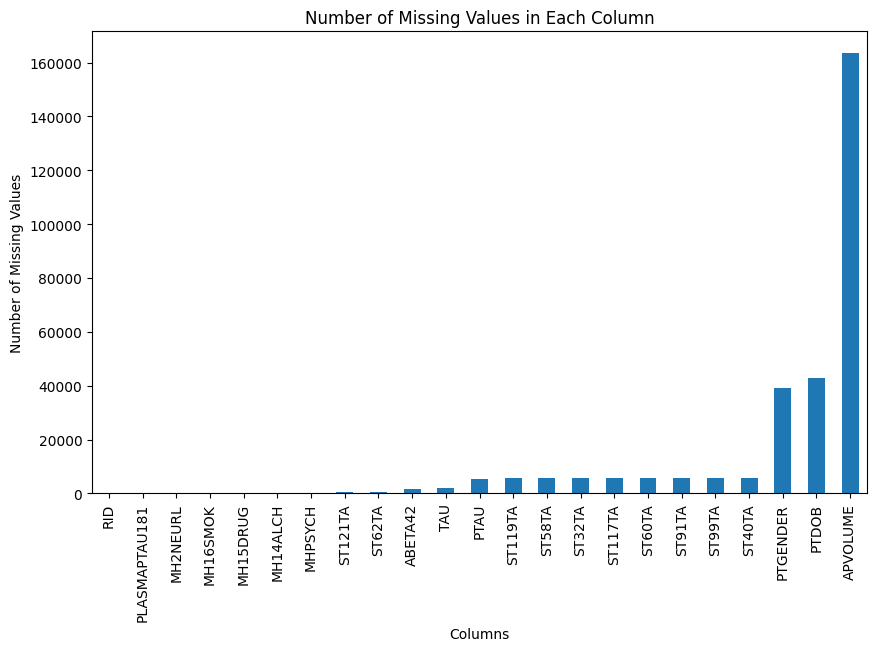

In [14]:
missing_values = merged_df.isnull().sum()
missing_values.sort_values(inplace=True) # Sort the values
missing_values.plot(kind='bar', figsize=(10, 6)) # Create a bar plot
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values in Each Column')
plt.show()

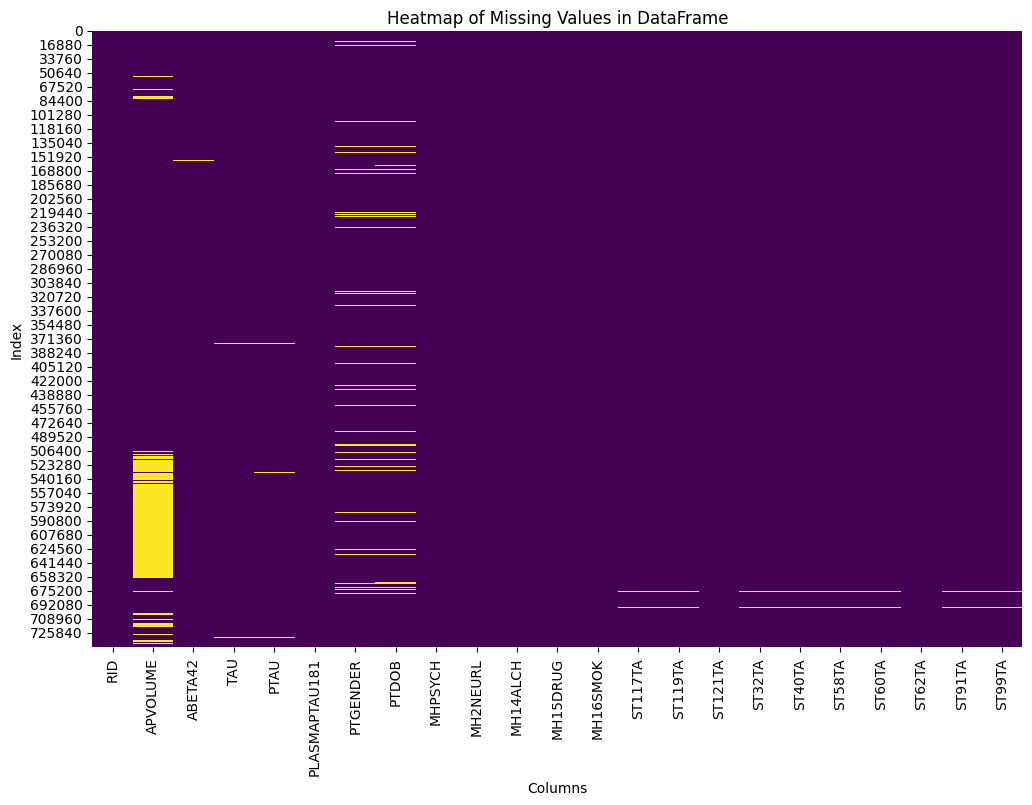

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Index')
plt.show()

In [16]:
cleaned_df_dropna = merged_df.dropna()
print(cleaned_df_dropna.describe())

                 RID       APVOLUME        ABETA42            TAU  \
count  537865.000000  537865.000000  537865.000000  537865.000000   
mean     2530.891097       0.390705    1261.005796     266.261582   
std      1533.006742       6.215089     643.410172     115.849659   
min        23.000000      -4.000000     203.000000      88.690000   
25%      1261.000000      -4.000000     717.200000     186.600000   
50%      2245.000000      -4.000000    1146.000000     239.100000   
75%      4187.000000       9.000000    1718.000000     313.200000   
max      5296.000000      12.000000    3949.000000     915.800000   

                PTAU  PLASMAPTAU181       PTGENDER        MHPSYCH  \
count  537865.000000  537865.000000  537865.000000  537865.000000   
mean       24.608651      16.228029       1.512430       0.400106   
std        12.965423       9.808985       0.499846       0.489920   
min         8.260000       0.468000       1.000000       0.000000   
25%        16.400000      10.2740

In [17]:
cleaned_df_mean = merged_df.copy()

for column in cleaned_df_mean.select_dtypes(include=['float64', 'int64']).columns:
    cleaned_df_mean[column].fillna(cleaned_df_mean[column].mean(), inplace=True)


<ipython-input-17-eafc50d4d64f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df_mean[column].fillna(cleaned_df_mean[column].mean(), inplace=True)


In [18]:
def parse_date(date_str):
    try:
        # Try parsing as "4/1/1931" format
        return pd.to_datetime(date_str, format='%m/%d/%Y')
    except ValueError:
        try:
            # Try parsing as "Apr-31" format
            month, year = date_str.split('-')
            month_num = pd.to_datetime(month, format='%b').month
            return pd.to_datetime(f'1-{month_num}-{year}', format='%d-%m-%y')
        except ValueError:
            try:
                # Try parsing as "01/1934" format
                month, year = date_str.split('/')
                return pd.to_datetime(f'1-{month}-{year}', format='%d-%m-%Y')
            except ValueError:
                # Return NaT for anything else
                return pd.NaT

# Apply it
cleaned_df_dropna['PTDOB'] = cleaned_df_dropna['PTDOB'].apply(parse_date)

# Print a few values to confirm
print(cleaned_df_dropna['PTDOB'].head())


0   1928-01-01
1   1928-01-01
2   1928-01-01
3   1928-01-01
4   1928-01-01
Name: PTDOB, dtype: datetime64[ns]


<ipython-input-18-a20a3a60c4fb>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_dropna['PTDOB'] = cleaned_df_dropna['PTDOB'].apply(parse_date)


In [19]:
target_names = [
"ST58TA", # Cortical Thickness Average of Left Superior Temporal
"ST117TA", # Cortical Thickness Average of Right Superior Temporal
"ST40TA", # Cortical Thickness Average of Left Middle Temporal
"ST99TA", # Cortical Thickness Average of Right Middle Temporal
"ST32TA", # Cortical Thickness Average of Left Inferior Temporal
"ST91TA", # Cortical Thickness Average of Right Inferior Temporal
"ST60TA", # Cortical Thickness Average of Left Temporal Pole
"ST119TA", # Cortical Thickness Average of Right Temporal Pole
"ST62TA", # Cortical Thickness Average of Left Transverse Temporal
"ST121TA" # Cortical Thickness Average of Right Transverse Temporal
]
# Features DataFrame (X)
# Drop target columns from the main DataFrame to create the features DataFrame
X = cleaned_df_dropna.drop(columns=target_names + ['RID'])
# Targets DataFrame (y)
# Select only the target columns for the target DataFrame
y = cleaned_df_dropna[target_names]

In [20]:
X['PTDOB'] = pd.to_datetime(X['PTDOB'])
X['year'] = X['PTDOB'].dt.year
X['month'] = X['PTDOB'].dt.month
X['day'] = X['PTDOB'].dt.day
# Now, you can drop the original datetime column if needed
X = X.drop(columns=['PTDOB'])

In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Columns to use for outlier detection and scaling
cols = ['APVOLUME', 'ABETA42', 'TAU', 'PTAU', 'PLASMAPTAU181']

# Calculate Q1, Q3, and IQR
Q1 = X[cols].quantile(0.25)
Q3 = X[cols].quantile(0.75)
IQR = Q3 - Q1

# Define an outlier mask (True = not an outlier)
outlier_mask = ~((X[cols] < (Q1 - 1.5 * IQR)) | (X[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the mask to filter out outliers
X_clean = X.loc[outlier_mask, cols]
y_clean = y[outlier_mask]

# Normalize the data using Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_clean), columns=cols)

# Display shapes before and after cleaning
print("Original shape of X:", X.shape)
print("New shape of X after outlier removal and scaling:", X_scaled.shape)
print("Original shape of y:", y.shape)
print("New shape of y after outlier and scaling process:", y_clean.shape)


Original shape of X: (537865, 14)
New shape of X after outlier removal and scaling: (484436, 5)
Original shape of y: (537865, 10)
New shape of y after outlier and scaling process: (484436, 10)


In [22]:
correlation_matrix = X.corr(method='spearman')

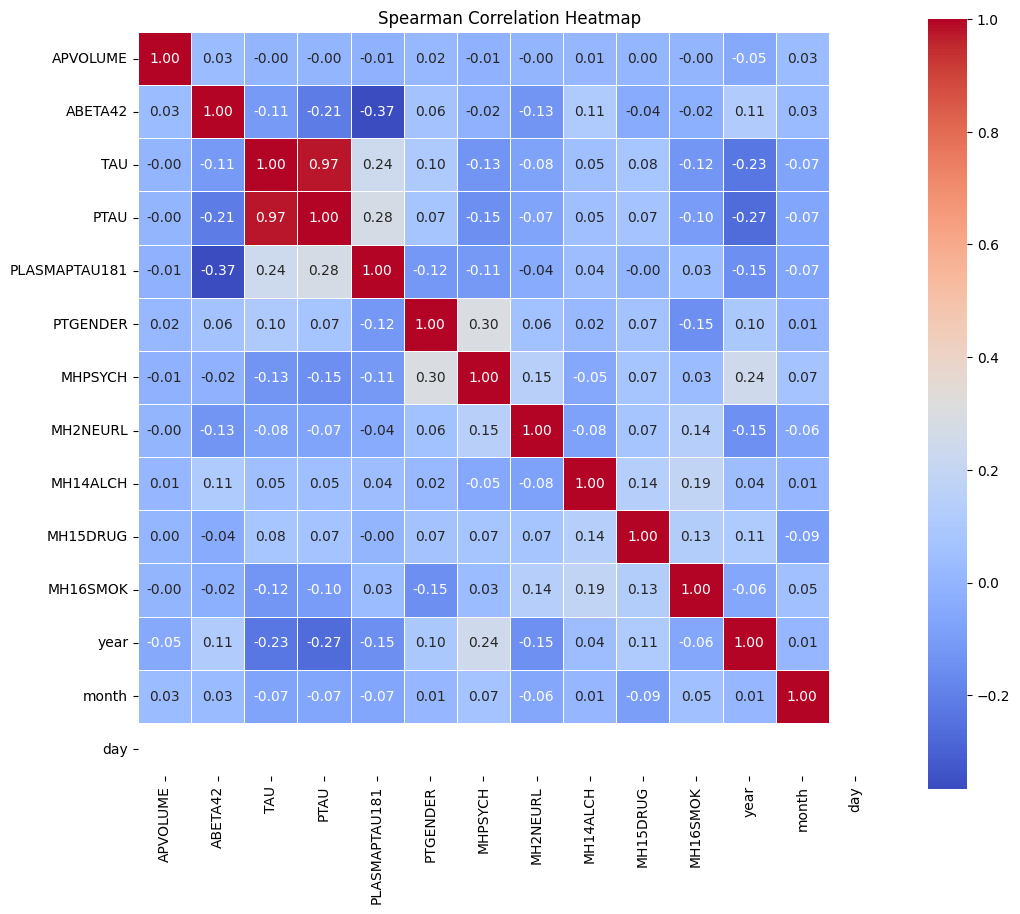

In [23]:
plt.figure(figsize=(12, 10)) # Set the figure size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
cbar=True, square=True, linewidths=.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

In [25]:
cleaned_df_dropna.to_csv('cleaned_data.csv', index=False)

In [26]:
cleaned_df_dropna.shape

(537865, 23)